# PREDICT BREAST CANCER

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve ,auc


In [2]:
cancer_data = pd.read_csv('cancer.data')

In [3]:
cancer_data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
cancer_data.shape

(698, 11)

In [5]:
cancer_data = cancer_data.rename(columns = {'1000025':'id number','2.1':'Class','5':'Clump Thickness','1':'Uniformity of Cell Size',
                                           '1.1':'Uniformity of Cell Shape','1.2':'Marginal Adhesion','2':'Single Epithelial Cell Size',
                                           '1.3':'Bare Nuclei','3':'Bland Chromatin','1.4':'Normal Nucleoli','1.5':'Mitoses'})

In [6]:
dict = {2:0,4:1}
cancer_data['Class'] = cancer_data['Class'].map(dict)

### Print DataFrame information

In [7]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
id number                      698 non-null int64
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Inspect missing values in the dataset

In [8]:
cancer_data.isnull().sum()

id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Replace the null values that are noticed by ispection

In [9]:
cancer_data = cancer_data.replace('?',np.nan)
cancer_data.isnull().sum()

id number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
cancer_data = cancer_data.fillna(cancer_data['Bare Nuclei'].value_counts().index[0])

In [11]:
cancer_data.isnull().sum()

id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Descriptive stats of the features

In [12]:
cancer_data.describe()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,0.345272
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.475798
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


### The distribution of the Target fearture

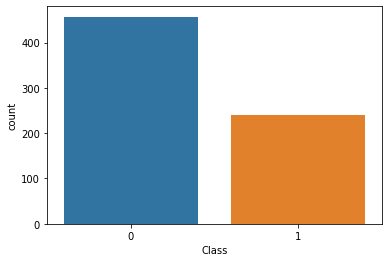

In [13]:
sns.countplot(x = 'Class',data = cancer_data)

For this dataset there is more of begnin than malignent.

In [14]:
cancer_data['Class'].value_counts()

0    457
1    241
Name: Class, dtype: int64

### Feature selection

The stats model regression model will be used to select 
the features looking at the p-value which shows the significance of each feature.

## Preprocessing the data 

The Data set has numeric features except for feature 1.3 
which is an object type as seen when looking at the Data set information.

In [15]:
le = LabelEncoder()

In [16]:
cancer_data['Bare Nuclei']=le.fit_transform(cancer_data['Bare Nuclei'])

In [17]:
cancer_data.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,1,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,0,3,1,1,0
4,1017122,8,10,10,8,7,1,9,7,1,1


##  Split the data into training and test sets

In [18]:
X =cancer_data.drop(['Class'],axis=1)
y =cancer_data['Class']

In [19]:
X_train, X_test, y_train,y_test  = train_test_split(X,
                                y,
                                test_size=0.30,
                                random_state=1)

### Significant features

In [20]:
import statsmodels.api as sm
stats_log_reg= sm.Logit(y_train,X_train)
result= stats_log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.179586
         Iterations 9


In [21]:
p_values = result.pvalues
p_values

id number                      5.468602e-20
Clump Thickness                1.694778e-03
Uniformity of Cell Size        2.052600e-02
Uniformity of Cell Shape       1.194492e-01
Marginal Adhesion              3.033026e-02
Single Epithelial Cell Size    3.344616e-01
Bare Nuclei                    2.829618e-02
Bland Chromatin                1.333197e-01
Normal Nucleoli                3.764844e-01
Mitoses                        7.622016e-01
dtype: float64

The P-values of all the features are diplayed above.
Those wich have a p-value > 0.05 then will be removed from the data that will be fed to the model. 

In [22]:
columns_to_drop = ['id number','Uniformity of Cell Shape','Single Epithelial Cell Size','Normal Nucleoli','Mitoses','Bland Chromatin']

In [23]:
X_train = X_train.drop(columns_to_drop,axis = 1)


In [24]:
X_test = X_test.drop(columns_to_drop,axis = 1)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(488, 4) (488,)
(210, 4) (210,)


### Scale the feature values to a uniform range.

In [26]:
scaler = MinMaxScaler(feature_range=(0 , 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

print(rescaledX_train.shape)
print(rescaledX_test.shape)

(488, 4)
(210, 4)


## Fitting a logistic regression model to the train set

#### Instantiate the model

In [27]:
logreg = LogisticRegression()

In [28]:
model = logreg.fit(rescaledX_train,y_train)


/home/olebogeng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Making predictions and evaluating performance

### Create a classification report and confusion matrix of predicted and observed values

In [29]:
y_pred = model.predict(rescaledX_test)

In [30]:
train_pred = model.predict(rescaledX_train)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

Accuracy of logistic regression classifier:  0.9619047619047619


In [33]:
confusion_matri = pd.DataFrame(confusion_matrix(y_pred,y_test),
                          index=['Predicted begnin (P)', 'Predicted malignent (N)'], 
                          columns=['Actual begnin (T)', 'Actual malignent (F) '])
confusion_matri

,Actual begnin (T),Actual malignent (F)
Predicted begnin (P),140,6
Predicted malignent (N),2,62


In [34]:
matrix = pd.DataFrame(confusion_matrix(train_pred,y_train),
                          index=['Predicted begnin (P)', 'Predicted malignent (N)'], 
                          columns=['Actual begnin (T)', 'Actual malignent (F) '])
matrix

,Actual begnin (T),Actual malignent (F)
Predicted begnin (P),304,13
Predicted malignent (N),11,160


The above table shows the confusion matrix based on the test set and the prediction from the model

#### The following calaculations are analysis made based on the above confusion matrix.

#### Accuracy

Overall, how often is the classifier correct?

Accuracy = TP+TN/(TP+TN+FN+FP)

In [35]:
Accuracy = ((141+1)/(141+1+6+62))
print(Accuracy)

0.6761904761904762


#### Precision

 When it predicts begnin, how often is it correct?

Precision= TP/(TP+FP)

In [36]:
Precision = (141/(141+6))
print(Precision)

0.9591836734693877


#### Recall

When it's actually begnin, how often does it predict begnin?

Recall= TP/(TP+FN)

In [37]:
Recall = (141/(141+62))
print(Recall)

0.6945812807881774


#### F1-score

F1 score= 2*Recall*Precision/(Precision+Recall)

This is a weighted average of the true positive rate (recall) and precision

In [38]:
F1_score = (2*Recall*Precision)/(Precision+Recall)
print(F1_score)

0.8057142857142857


## Receiver Operating Characteristic

This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds.
It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis)
as you vary the threshold for assigning observations to a given class.

In [39]:
y_pred_proba = model.predict_proba(rescaledX_test)
train_pred_proba = model.predict_proba(rescaledX_train)


In [40]:
pred = y_pred_proba[:,1]
train_pred = train_pred_proba[:,1]

In [41]:
fpr, tpr,_ = roc_curve(y_test,pred)
roc_auc = auc(fpr, tpr)
train_fpr , train_tpr,_ = roc_curve(y_train,train_pred)
train_auc = auc(train_fpr,train_tpr)

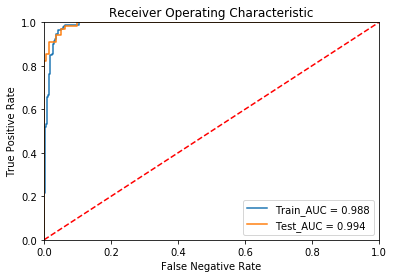

In [42]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr,label = 'Train_AUC = %0.3f' % train_auc)
plt.plot(fpr, tpr,label = 'Test_AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Negative Rate')
plt.show()

The AUC is 0.994 which shows that the model predictions are quite good. 

The ROC curve shows that the model performs better in the test data than in the Train data.
The model is generalising well. **One can say that the model is not overfitting or underfitting.**

### What is overdispersion?

overdispersion is the presence of greater variability in a data set than would be expected based on a given statistical model. 

In this project specifically the AUC is 0.994 which
shows less variablility in the data and the predictions therefore this model could be the best model for this data. 